Import appropriate packages

In [1]:
#hide
from utils import *
from fastai2.vision.widgets import *

# From model to production

## Gathering data

To download images with Bing Image Search, you should sign up at Microsoft for *Bing Image Search*. You will be given a key, which you can either paste here, replacing "XXX":

### ***Use provided fxn to download urls for a search term

In [12]:
# the api key from Bing image search
key = 'e8ca2dc2b0004429b5c8fabb9009b0b9'

In [18]:
search_images_bing

<function utils.search_images_bing(key, term, min_sz=128)>

In [20]:
results = search_images_bing(key, 'grizzly bear')
urls = results.attrgot('content_url')
urls

(#150) ['https://upload.wikimedia.org/wikipedia/commons/e/e2/Grizzlybear55.jpg','http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg','https://www.pbs.org/wnet/nature/files/2018/07/Bear133-1280x720.jpg','http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s400/Grizzly+Bear+Pic.jpg','https://i.ytimg.com/vi/4dXxojR818w/hqdefault.jpg','https://i2-prod.mirror.co.uk/incoming/article6580991.ece/ALTERNATES/s615/Grizzly-Bear.jpg','https://static.independent.co.uk/s3fs-public/styles/article_small/public/thumbnails/image/2016/06/30/08/yellowstone-grizzly-bear-.jpg','http://images.gearjunkie.com/uploads/2015/07/Grizzly-Bear.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufort.jpg/1200px-GrizzlyBearJeanBeaufort.jpg','http://2.bp.blogspot.com/-NHxROh-qE2w/USOjxfWt_pI/AAAAAAAAFBA/8msDxZNdvZ0/s1600/Grizzly_Bear_Info_Images+03.jpg'...]

In [21]:
len(urls)

150

### ***Download one sample image and display it

In [22]:
urls[1]

'http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg'

In [23]:
dest = 'images/my_griz.jpg'
download_url(urls[1], dest)

In [26]:
im = PILImage.create(dest)

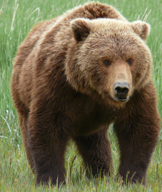

In [27]:
im.to_thumb(192, 192)

### ***Download the all images for the various classes

In [29]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('new_bear')

In [31]:
path.mkdir(exist_ok=True)

for bear in bear_types:
    dest = path/bear
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{bear} bear')
    download_images(dest, urls=results.attrgot('content_url'))


 Download of https://www.theanimalspot.com/wp-content/uploads/2019/01/americanblackbearsmall.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p new_bear/black
$ cd new_bear/black
$ wget -c https://www.theanimalspot.com/wp-content/uploads/2019/01/americanblackbearsmall.jpg
$ tar xf americanblackbearsmall.jpg
 And re-run your code once the download is successful




 Download of https://lutlut94isp.files.wordpress.com/2013/04/teddy_bears.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p new_bear/teddy
$ cd new_bear/teddy
$ wget -c https://lutlut94isp.files.wordpress.com/2013/04/teddy_bears.jpg
$ tar xf teddy_bears.jpg
 And re-run your code once the download is successful



### ***Remove any downloaded files that are not images

In [32]:
fns = get_image_files(path)
fns

(#447) [Path('new_bear/grizzly/00000001.jpg'),Path('new_bear/grizzly/00000000.jpg'),Path('new_bear/grizzly/00000003.jpg'),Path('new_bear/grizzly/00000006.jpg'),Path('new_bear/grizzly/00000004.jpg'),Path('new_bear/grizzly/00000010.jpg'),Path('new_bear/grizzly/00000008.jpg'),Path('new_bear/grizzly/00000009.jpg'),Path('new_bear/grizzly/00000012.jpg'),Path('new_bear/grizzly/00000013.jpg')...]

In [34]:
# use verify_images function to check for files that are corrupt
failed = verify_images(fns)
failed

/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be ide

(#22) [Path('new_bear/grizzly/00000038.jpg'),Path('new_bear/grizzly/00000022.jpg'),Path('new_bear/grizzly/00000053.jpg'),Path('new_bear/grizzly/00000061.jpg'),Path('new_bear/grizzly/00000076.jpg'),Path('new_bear/grizzly/00000080.jpg'),Path('new_bear/grizzly/00000062.jpg'),Path('new_bear/grizzly/00000084.jpg'),Path('new_bear/black/00000015.jpg'),Path('new_bear/black/00000049.jpg')...]

In [35]:
failed.map(Path.unlink) # delete the files

(#22) [None,None,None,None,None,None,None,None,None,None...]

## From data to DataLoaders

### ***Create Dataloaders using the DataBlock API and display images from the validation dataloader

In [38]:
db = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.3, seed=672),
        get_y=parent_label,
        item_tfms=Resize(128))

In [39]:
dls = db.dataloaders(path)

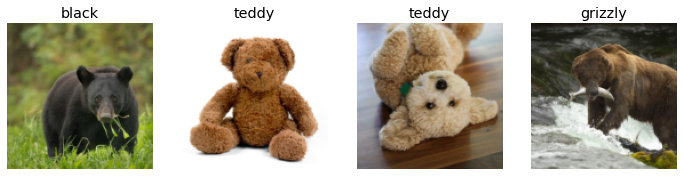

In [40]:
# display images from the validation dataloader
dls.valid.show_batch(max_n=4, nrows=1)

### ***Use different resizing methods to show how the effect they have on the images

*squish*

In [42]:
db = db.new(item_tfms=Resize(128, method=ResizeMethod.Squish))
dls = db.dataloaders(path)

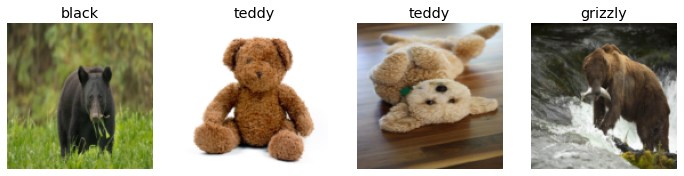

In [43]:
dls.valid.show_batch(max_n=4, nrows=1)

*pad*

In [44]:
db = db.new(item_tfms=Resize(128, method=ResizeMethod.Pad,
                            pad_mode='zeros'))
dls = db.dataloaders(path)

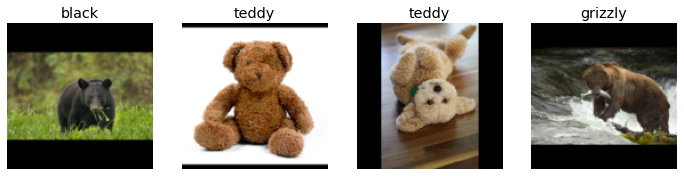

In [45]:
dls.valid.show_batch(max_n=4, nrows=1)

### ***Use RandomResizedCrop on a single image to show it's effects

In [51]:
db = db.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = db.dataloaders(path)
dls.train.get_idxs = lambda: Inf.ones

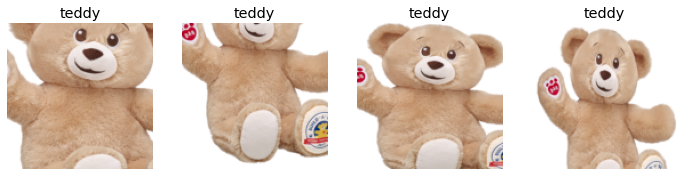

In [52]:
dls.train.show_batch(max_n=4, nrows=1)

### Data augmentation

### ***Use batch transforms to demonstrate how data augmentation works on a single image

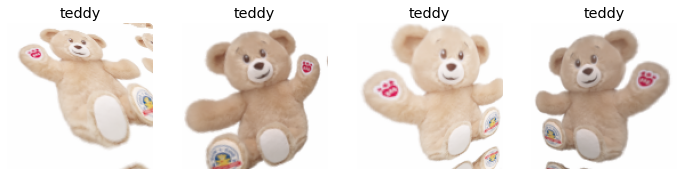

In [55]:
db = db.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2.0))
dls = db.dataloaders(path)
dls.train.get_idxs = lambda: Inf.ones
dls.train.show_batch(max_n=4, nrows=1)

## Training your model, and using it to clean your data

### *** define new dl and use it to train your model

In [56]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=672),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [57]:
dls = db.dataloaders(path)

In [58]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.302339,0.446487,0.152941,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.126603,0.133593,0.047059,00:08
1,0.093569,0.124535,0.011765,00:08
2,0.072273,0.160236,0.023529,00:08
3,0.061488,0.179577,0.023529,00:07
4,0.048779,0.176717,0.023529,00:08


### ***Plot confusion matrix and show top losses

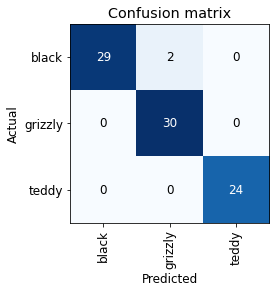

In [59]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

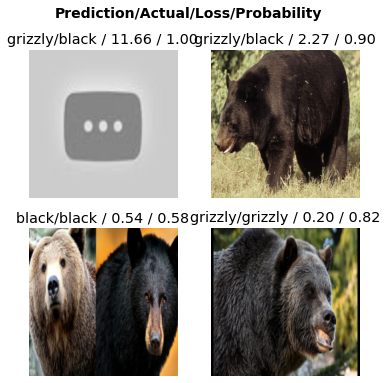

In [61]:
interp.plot_top_losses(4)

### *** Use cleaner to clean the dataset

In [66]:
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/data/load.py", line 106, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastcore/utils.py", line 270, in chunked
    res = list(itertools.islice(it, cs))
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/data/load.py", line 119, in do_item
    try: return self.after_item(self.create_item(s))
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/data/load.py", line 125, in create_item
    def create_item(self, s):  return next(self.it) if s is None else self.dataset[s]
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/data/core.py", line 278, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/data/core.py", line 278, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/data/core.py", line 255, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/data/core.py", line 218, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastcore/transform.py", line 185, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastcore/transform.py", line 138, in compose_tfms
    x = f(x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastcore/transform.py", line 72, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastcore/transform.py", line 82, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastcore/transform.py", line 86, in _do_call
    return x if f is None else retain_type(f(x, **kwargs), x, f.returns_none(x))
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastcore/dispatch.py", line 98, in __call__
    return f(*args, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/vision/core.py", line 98, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai2/vision/core.py", line 74, in load_image
    im = Image.open(fn, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py", line 2809, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/course-v4/nbs/new_bear/black/00000048.jpg'


In [65]:
# effect the neccessary changes

# delete files that were marked to be deleted
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# move files that were marked to be moved to other classes
for idx, cat in cleaner.change(): 
    shutil.move(cleaner.fns[idx], path/cat)

AttributeError: 'PosixPath' object has no attribute 'rstrip'

### *** Retrain the model to see the improvement you can get

In [67]:
dls = db.dataloaders(path)

In [68]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.580534,0.049763,0.011905,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.146582,0.017703,0.000000,00:07
1,0.113678,0.009210,0.000000,00:07
2,0.084548,0.007809,0.000000,00:07
3,0.068339,0.009331,0.000000,00:07
4,0.055598,0.007029,0.000000,00:06


## Turning your model into an online application

### Using the model for inference

### ***Save model, load it and use it for inference

In [69]:
learn.export()

In [72]:
# check if file exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [2]:
# load model for inference
learn_inf = load_learner('export.pkl')

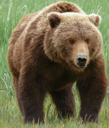

In [76]:
img = PILImage.create('images/grizzly.jpg')
img.to_thumb(128, 128)

In [77]:
cat, cat_id, probs = learn_inf.predict(img)
cat

'grizzly'

In [78]:
probs[cat_id]

tensor(1.0000)

In [79]:
learn_inf.dls.vocab

(#3) ['black','grizzly','teddy']

In [80]:
a = 0.234234123

In [82]:
print(f'{a:.03f}')

0.234


### Creating a Notebook app from the model

*step 1: create label to display information*

In [3]:
info_label = widgets.Label('Identify your bear')
info_label

Label(value='Identify your bear')

*step 2: create a file upload widget*

In [4]:
btn_upload = widgets.FileUpload()

*step 3: create output widget to display uploaded image*

In [5]:
display_image = widgets.Output()

*step 4: get your predictions*

*step 5: use a label widget to display predictions*

In [6]:
preds_label = widgets.Label()

*step 6: create a button to trigger the classification*

In [7]:
trigger_btn = widgets.Button(description='Classify')

*step 7: add a click event handler to encapsulate all the processes*

In [8]:
def on_click_classify(change):
    # get the uploaded image
    img = PILImage.create(btn_upload.data[-1])
    # get predictions
    pred, pred_idx, probs = learn_inf.predict(img)
    # display the image
    display_image.clear_output()
    with display_image: display(img.to_thumb(128, 128))
    # display the predictions
    preds_label.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    

In [9]:
trigger_btn.on_click(on_click_classify)

*step 8: put everything in a VBox*

In [10]:
# reset upload button
btn_upload = widgets.FileUpload()

VBox([info_label, btn_upload, trigger_btn, 
      display_image, preds_label])

### Turning your notebook into a real app

In [11]:
#hide
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 5.9 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 183 kB 14.5 MB/s eta 0:00:01
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.1.21 OK


### Deploying your app

## How to avoid disaster

### Unforeseen consequences and feedback loops

## Get writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly, due to structural or style differences to the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain approach?
1. How do the steps of the Drivetrain approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between crop, pad, and squish resize approaches? When might you choose one over the other?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are 3 examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out of domain data"?
1. What is "domain shift"?
1. What are the 3 steps in the deployment process?
1. For a project you're interested in applying deep learning to, consider the thought experiment "what would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.

### Further research

1. Consider how the Drivetrain approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?